###  Sandbox 

This notebook is about figuring out the best thing to do to handle missing bins during APOGEE training

In [ ]:
%load_ext autoreload
%autoreload 2

import astropy
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

import inspect

from apoNN.src.occam import Occam

import apogee.tools.read as apread
import apogee.tools.path as apogee_path
from apogee.tools import bitmask
import collections


from apoNN.src.datasets import ApogeeDataset
from apoNN.src.utils import generate_loss_with_masking
from apoNN.src.utils import dump
from apoNN.src.utils import load
import apoNN.src.vectors as vector

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.nn as nn
from sklearn.decomposition import PCA


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

apogee_path.change_dr(16)

In [248]:
n_data=200

In [249]:
occam = load("occam")
allStar_occam = occam["allStar"]
retained = np.delete(np.arange(len(allStar_occam)),bad_indexes)
#len(allStar_occam[retained])
dataset_occam = ApogeeDataset(allStar_occam[retained],outputs = ["aspcap","mask","physical","idx"])
occam_cluster_idxs = occam["cluster_idxs"][retained]
len(occam_cluster_idxs)

NameError: name 'bad_indexes' is not defined

In [12]:
%load_ext autoreload
%autoreload 2

import astropy
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

import inspect

from apoNN.src.occam import Occam

import apogee.tools.read as apread
import apogee.tools.path as apogee_path
from apogee.tools import bitmask
import collections


from apoNN.src.datasets import ApogeeDataset,AspcapDataset

from apoNN.src.utils import generate_loss_with_masking
from apoNN.src.utils import dump
from apoNN.src.utils import load
import apoNN.src.vectors as vector

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.nn as nn
from sklearn.decomposition import PCA


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

apogee_path.change_dr(14)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
allStar= apread.allStar(rmcommissioning=True,main=False,ak=True, akvers='targ',adddist=False)

upper_temp_cut = allStar["Teff"]<7000
lower_temp_cut = allStar["Teff"]>3500
lower_g_cut = allStar["logg"]>1.
upper_g_cut = allStar["logg"]<3.5
snr_cut = allStar["SNR"]>100
snr_highcut = allStar["SNR"]<500




combined_cut = lower_g_cut & upper_g_cut & lower_temp_cut & upper_temp_cut & snr_cut & snr_highcut
cutdr14_allStar = allStar[combined_cut][:13000]

(-1, 1)

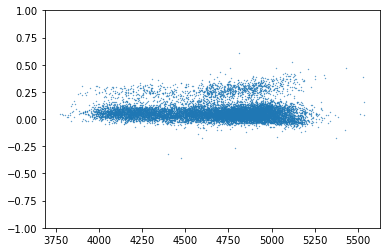

In [14]:
plt.scatter(cutdr14_allStar["Teff"],cutdr14_allStar["Mg_FE"],s=0.1)
plt.ylim(-1,1)

In [15]:
apogee_path.change_dr(16)
allStar= apread.allStar(rmcommissioning=True,main=False,ak=True, akvers='targ',adddist=False)

upper_temp_cut = allStar["Teff"]<7000
lower_temp_cut = allStar["Teff"]>3500
lower_g_cut = allStar["logg"]>1.
upper_g_cut = allStar["logg"]<3.5
snr_cut = allStar["SNR"]>100
snr_highcut = allStar["SNR"]<500




combined_cut = lower_g_cut & upper_g_cut & lower_temp_cut & upper_temp_cut & snr_cut & snr_highcut
cutdr16_allStar = allStar[combined_cut][:13000]

Text(0.5, 0, 'logg')

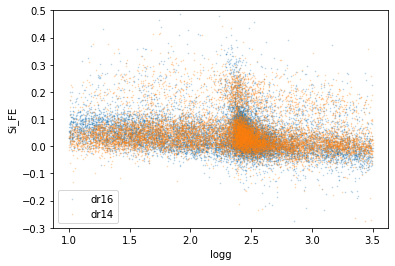

In [40]:
plt.scatter(cutdr14_allStar["logg"],cutdr14_allStar["Si_FE"],s=0.3,alpha=0.3,label="dr16")
plt.scatter(cutdr16_allStar["logg"],cutdr16_allStar["Si_FE"],s=0.3,alpha=0.3,label="dr14")
plt.legend()
plt.ylim(-0.3,0.5)
plt.ylabel("Si_FE")
plt.xlabel("logg")
#plt.xlim(4500,5000)
